#### Simulation

In [1]:
# Arm n: 1-24 
# Random Reward Distribution max(Normal(100+2*n,24),0)

import numpy as np
import pandas as pd
import random

In [2]:
def generate_sim(n=10000, arms = 24):
    df = pd.DataFrame(columns = ['arm','reward'])
    random.seed(1005)
    for i in range(0,arms+1):
        np.random.seed(i) 
        df = pd.concat([df,pd.DataFrame.from_dict({'arm':[i]*n,
                                    'reward':np.random.normal(50+i,8,n)})])
        
    return df.reset_index().drop(['index'],axis=1)

In [3]:
class pull_simulator:
    
    def __init__(self, df):
        arms = len(df.arm.unique()) # how many arms
        self.df = df
        self.reward_count = dict(zip(df.arm.unique(),[0]*arms)) # store for 'NetReward'
        self.pull_count = dict(zip(df.arm.unique(),[0]*arms)) # store for 'Pull'
        self.pulled = [] # store the index of data rows that had already been pulled
    
    # Function that simulate pull function from pull_server.py
    # return example : {'Arm': '2', 'NetReward': 455, 'Pull': 30, 'Reward': 22}
    def pull(self, arm_to_pull):
        
        if len(self.pulled) == len(self.df):
            print("Pulled Out in All Arms")
            return None
        
        indices = self.df[(self.df.arm == arm_to_pull) &
                         ~self.df.index.isin(self.pulled)].index
        
        pulled_index = random.choice(indices)
        self.pulled.append(pulled_index)
        self.pull_count[arm_to_pull] += 1
        self.reward_count[arm_to_pull] += self.df['reward'].loc[pulled_index]
        
        return {'Arm': arm_to_pull, 
                'NetReward': self.reward_count[arm_to_pull],
                'Pull': self.pull_count[arm_to_pull], 
                'Reward': self.df['reward'].loc[pulled_index]}

In [4]:
# Re-run this to re-start a simulation
ps = pull_simulator(generate_sim())

In [5]:
for i in range(3):
    print(ps.pull(1))

{'Arm': 1, 'NetReward': 44.64977961094425, 'Pull': 1, 'Reward': 44.64977961094425}
{'Arm': 1, 'NetReward': 94.51354359170824, 'Pull': 2, 'Reward': 49.863763980763984}
{'Arm': 1, 'NetReward': 151.4278334754102, 'Pull': 3, 'Reward': 56.91428988370196}


In [6]:
for i in range(3):
    print(ps.pull(24))

{'Arm': 24, 'NetReward': 61.92345519892131, 'Pull': 1, 'Reward': 61.92345519892131}
{'Arm': 24, 'NetReward': 134.09606511002826, 'Pull': 2, 'Reward': 72.17260991110696}
{'Arm': 24, 'NetReward': 188.00443550520913, 'Pull': 3, 'Reward': 53.90837039518085}


In [7]:
def explore_only(counts, average_rewards, N):
    for arm, count in enumerate(counts):
        if count < N:
            return arm
    selected_arm = average_rewards.index(max(average_rewards))
    return selected_arm

In [8]:
def use_explore(total_round):
    number_arms = 24
    counts = [0 for arm in range(number_arms)]
    total_count = 0
    average_rewards = [0 for arm in range(number_arms)]

    results = []

    for t in range(total_round):
        selected_arm = explore_only(counts, average_rewards, N=20)
        result = ps.pull(selected_arm)
  
        reward = result['Reward']
        
        counts[selected_arm] += 1
        total_count = sum(counts)
        count = counts[selected_arm] 
        average_rewards[selected_arm] =  ((count-1)/count) * average_rewards[selected_arm] + (1/count) * reward
        results.append([selected_arm, counts[selected_arm], reward])
        if t%10 == 0:
            print("Pull =", t, '; Best Arm = ', str(average_rewards.index(max(average_rewards))+1))
        
    return results, average_rewards

In [9]:
total_round = 480
ps = pull_simulator(generate_sim())
results, average_rewards = use_explore(total_round)

Pull = 0 ; Best Arm =  1
Pull = 10 ; Best Arm =  1
Pull = 20 ; Best Arm =  2
Pull = 30 ; Best Arm =  2
Pull = 40 ; Best Arm =  2
Pull = 50 ; Best Arm =  2
Pull = 60 ; Best Arm =  4
Pull = 70 ; Best Arm =  4
Pull = 80 ; Best Arm =  4
Pull = 90 ; Best Arm =  4
Pull = 100 ; Best Arm =  6
Pull = 110 ; Best Arm =  6
Pull = 120 ; Best Arm =  7
Pull = 130 ; Best Arm =  7
Pull = 140 ; Best Arm =  7
Pull = 150 ; Best Arm =  7
Pull = 160 ; Best Arm =  7
Pull = 170 ; Best Arm =  7
Pull = 180 ; Best Arm =  10
Pull = 190 ; Best Arm =  7
Pull = 200 ; Best Arm =  7
Pull = 210 ; Best Arm =  11
Pull = 220 ; Best Arm =  7
Pull = 230 ; Best Arm =  7
Pull = 240 ; Best Arm =  13
Pull = 250 ; Best Arm =  13
Pull = 260 ; Best Arm =  13
Pull = 270 ; Best Arm =  14
Pull = 280 ; Best Arm =  14
Pull = 290 ; Best Arm =  15
Pull = 300 ; Best Arm =  16
Pull = 310 ; Best Arm =  16
Pull = 320 ; Best Arm =  17
Pull = 330 ; Best Arm =  17
Pull = 340 ; Best Arm =  18
Pull = 350 ; Best Arm =  18
Pull = 360 ; Best Arm =  

In [10]:
# convert to dataframe
col = ['Arm', 'Pull', 'Reward']
results = pd.DataFrame(results, columns=col)
# display(results)

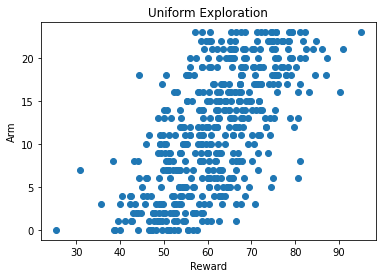

In [11]:
import matplotlib.pyplot as plt

plt.scatter(results['Reward'],results['Arm'])
plt.title('Uniform Exploration')
plt.xlabel('Reward')
plt.ylabel('Arm')
plt.show()

Average rewards =  [47.881029488515104, 51.49826988498289, 50.97575818876123, 53.07560871245311, 54.23539722450938, 59.220090954284586, 59.989227026974945, 55.482440584756596, 58.16624392144847, 58.6747712082192, 57.04692906171891, 60.19290307857943, 62.97393987735986, 64.73664155445445, 63.80268120705612, 64.26900827990484, 66.32301859051131, 68.5538417694741, 68.7828410537533, 68.5801819408428, 70.50779441994314, 71.48820381074293, 71.622773533917, 72.82595408122255]


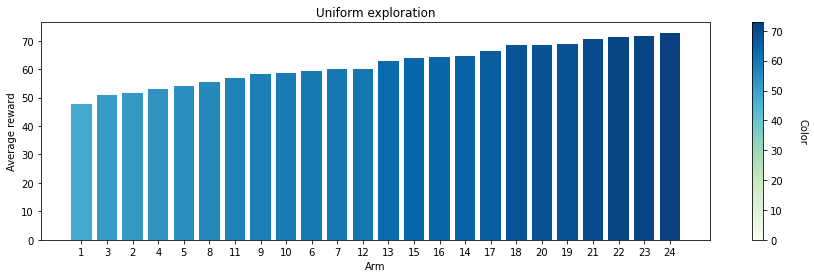

Best Arm =  24


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

print('Average rewards = ', average_rewards)
data = {'Arm': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
        'Uniform_average_rewards': average_rewards}

df = pd.DataFrame(data)
df.sort_values('Uniform_average_rewards', axis = 0, ascending = True, inplace = True)

data_x = df['Arm']
data_hight = df['Uniform_average_rewards']
data_hight_normalized = [x / max(data_hight) for x in data_hight]
fig, ax = plt.subplots(figsize=(15, 4))
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_hight_normalized)
rects = ax.bar(data_x, data_hight, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_hight)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

plt.xticks(data_x)    
plt.ylabel('Average reward')
plt.xlabel('Arm')
plt.title('Uniform exploration')
plt.savefig("bar_chart_with_colorbar_03.png", bbox_inches='tight')
plt.show()

print('Best Arm = ', str(average_rewards.index(max(average_rewards))+1))

plt.bar(number_arms, average_rewards, align='center')
plt.xlabel('Arm')
plt.ylabel('Average rewards')
plt.show()

In [13]:
def epsilon_greedy(number_arms, average_rewards, e):
    if random.random() <= e:
        selected_arm = random.choice(range(number_arms))
    else:
        selected_arm = average_rewards.index(max(average_rewards))
        
    return selected_arm       

In [14]:
def use_epsilon_greedy(total_round):
    number_arms = 24
    counts = [0 for arm in range(number_arms)]
    total_count = 0
    average_rewards = [0 for arm in range(number_arms)]

    results = []

    for t in range(total_round):
        selected_arm = epsilon_greedy(number_arms, average_rewards, e=0.2)
        result = ps.pull(selected_arm)
       
        reward = result['Reward']
        
        counts[selected_arm] += 1
        total_count = sum(counts)
        count = counts[selected_arm] 
        average_rewards[selected_arm] =  ((count-1)/count) * average_rewards[selected_arm] + (1/count) * reward
        results.append([selected_arm, counts[selected_arm], reward])
        if t%10 == 0:
            print("Pull =", t, '; Best Arm = ', str(average_rewards.index(max(average_rewards))+1))
        
    return results, average_rewards

In [15]:
ps = pull_simulator(generate_sim())
results, average_rewards = use_epsilon_greedy(total_round)

Pull = 0 ; Best Arm =  1
Pull = 10 ; Best Arm =  1
Pull = 20 ; Best Arm =  22
Pull = 30 ; Best Arm =  22
Pull = 40 ; Best Arm =  22
Pull = 50 ; Best Arm =  22
Pull = 60 ; Best Arm =  22
Pull = 70 ; Best Arm =  22
Pull = 80 ; Best Arm =  22
Pull = 90 ; Best Arm =  22
Pull = 100 ; Best Arm =  24
Pull = 110 ; Best Arm =  24
Pull = 120 ; Best Arm =  22
Pull = 130 ; Best Arm =  24
Pull = 140 ; Best Arm =  24
Pull = 150 ; Best Arm =  24
Pull = 160 ; Best Arm =  24
Pull = 170 ; Best Arm =  24
Pull = 180 ; Best Arm =  24
Pull = 190 ; Best Arm =  21
Pull = 200 ; Best Arm =  21
Pull = 210 ; Best Arm =  24
Pull = 220 ; Best Arm =  24
Pull = 230 ; Best Arm =  24
Pull = 240 ; Best Arm =  24
Pull = 250 ; Best Arm =  24
Pull = 260 ; Best Arm =  24
Pull = 270 ; Best Arm =  24
Pull = 280 ; Best Arm =  24
Pull = 290 ; Best Arm =  24
Pull = 300 ; Best Arm =  24
Pull = 310 ; Best Arm =  24
Pull = 320 ; Best Arm =  24
Pull = 330 ; Best Arm =  24
Pull = 340 ; Best Arm =  24
Pull = 350 ; Best Arm =  24
Pull 

In [16]:
# convert to dataframe
col = ['Arm', 'Pull', 'Reward']
results = pd.DataFrame(results, columns=col)
# display(results)

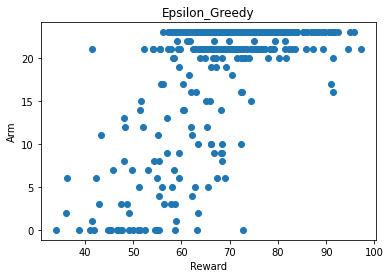

In [17]:
plt.scatter(results['Reward'],results['Arm'])
plt.title('Epsilon_Greedy')
plt.xlabel('Reward')
plt.ylabel('Arm')
plt.show()

Average rewards =  [49.660548119694575, 50.143307535549766, 49.536642916144906, 51.99662429929157, 58.837577743277336, 58.68307670752918, 54.89318743664613, 51.75812621009436, 56.52324915886159, 63.96874618160753, 67.2948116217512, 53.558799946310856, 56.86329672289334, 52.562133137741355, 60.07321899609143, 64.260218480094, 72.2769621159004, 65.84181640473906, 66.01698084299787, 65.53186645659659, 71.50176386775193, 70.72994098639704, 69.35164992816914, 73.13254475088372]


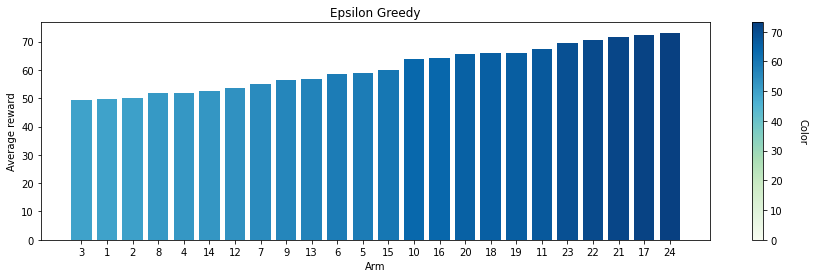

Best Arm =  24


In [18]:
print('Average rewards = ', average_rewards)
data = {'Arm': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
        'epsilon_average_rewards':average_rewards}

df = pd.DataFrame(data)
df.sort_values('epsilon_average_rewards', axis = 0, ascending = True, inplace = True)

data_x = df['Arm']
data_hight = df['epsilon_average_rewards']
data_hight_normalized = [x / max(data_hight) for x in data_hight]
fig, ax = plt.subplots(figsize=(15, 4))
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_hight_normalized)
rects = ax.bar(data_x, data_hight, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_hight)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

plt.xticks(data_x)    
plt.ylabel('Average reward')
plt.xlabel('Arm')
plt.title('Epsilon Greedy')
plt.savefig("bar_chart_with_colorbar_04.png", bbox_inches='tight')
plt.show()

print('Best Arm = ', str(average_rewards.index(max(average_rewards))+1))

In [19]:
def use_adaptive_epsilon_greedy(total_round):
    number_arms = 24
    counts = [0 for arm in range(number_arms)]
    total_count = 0
    average_rewards = [0 for arm in range(number_arms)]

    results = []

    for t in range(1, total_round+1):
        selected_arm = epsilon_greedy(number_arms, average_rewards, e=min(1,24/t))
        result = ps.pull(selected_arm)
        print(result)
        reward = result['Reward']
        
        counts[selected_arm] += 1
        total_count = sum(counts)
        count = counts[selected_arm] 
        average_rewards[selected_arm] =  ((count-1)/count) * average_rewards[selected_arm] + (1/count) * reward
        results.append([selected_arm, counts[selected_arm], reward])
        if t%10 == 0:
            print("Pull =", t, '; Best Arm = ', str(average_rewards.index(max(average_rewards))+1))
        
    return results, average_rewards

In [20]:
ps = pull_simulator(generate_sim())
results, average_rewards = use_adaptive_epsilon_greedy(total_round)

{'Arm': 12, 'NetReward': 59.281006300529334, 'Pull': 1, 'Reward': 59.281006300529334}
{'Arm': 18, 'NetReward': 50.58856363671029, 'Pull': 1, 'Reward': 50.58856363671029}
{'Arm': 21, 'NetReward': 60.32498283229336, 'Pull': 1, 'Reward': 60.32498283229336}
{'Arm': 18, 'NetReward': 118.75785028270376, 'Pull': 2, 'Reward': 68.16928664599347}
{'Arm': 6, 'NetReward': 50.71079861207002, 'Pull': 1, 'Reward': 50.71079861207002}
{'Arm': 18, 'NetReward': 185.41364827633782, 'Pull': 3, 'Reward': 66.65579799363405}
{'Arm': 1, 'NetReward': 48.94420063049756, 'Pull': 1, 'Reward': 48.94420063049756}
{'Arm': 8, 'NetReward': 43.32754988592354, 'Pull': 1, 'Reward': 43.32754988592354}
{'Arm': 20, 'NetReward': 65.04659859639933, 'Pull': 1, 'Reward': 65.04659859639933}
{'Arm': 6, 'NetReward': 109.47963359616818, 'Pull': 2, 'Reward': 58.768834984098156}
Pull = 10 ; Best Arm =  21
{'Arm': 11, 'NetReward': 63.476443303162995, 'Pull': 1, 'Reward': 63.476443303162995}
{'Arm': 21, 'NetReward': 133.5292138751385, '

{'Arm': 22, 'NetReward': 3009.6649615140836, 'Pull': 40, 'Reward': 79.83328565555566}
{'Arm': 22, 'NetReward': 3094.08276886603, 'Pull': 41, 'Reward': 84.41780735194641}
{'Arm': 15, 'NetReward': 139.46715797112165, 'Pull': 2, 'Reward': 74.30867855901039}
Pull = 100 ; Best Arm =  23
{'Arm': 22, 'NetReward': 3173.912473715071, 'Pull': 42, 'Reward': 79.82970484904068}
{'Arm': 22, 'NetReward': 3245.8963883655338, 'Pull': 43, 'Reward': 71.98391465046258}
{'Arm': 22, 'NetReward': 3315.679984131316, 'Pull': 44, 'Reward': 69.78359576578227}
{'Arm': 22, 'NetReward': 3380.8057219557013, 'Pull': 45, 'Reward': 65.12573782438517}
{'Arm': 22, 'NetReward': 3447.3057516556846, 'Pull': 46, 'Reward': 66.50002969998324}
{'Arm': 22, 'NetReward': 3512.421316338754, 'Pull': 47, 'Reward': 65.11556468306935}
{'Arm': 22, 'NetReward': 3578.8516269020615, 'Pull': 48, 'Reward': 66.43031056330776}
{'Arm': 7, 'NetReward': 171.84627723622376, 'Pull': 3, 'Reward': 51.675255294081744}
{'Arm': 22, 'NetReward': 3655.554

{'Arm': 22, 'NetReward': 8683.36471797033, 'Pull': 118, 'Reward': 82.74709758601577}
{'Arm': 22, 'NetReward': 8757.551037932395, 'Pull': 119, 'Reward': 74.18631996206527}
{'Arm': 22, 'NetReward': 8825.7996144961, 'Pull': 120, 'Reward': 68.2485765637045}
{'Arm': 22, 'NetReward': 8888.429073223906, 'Pull': 121, 'Reward': 62.62945872780603}
{'Arm': 22, 'NetReward': 8961.81938094157, 'Pull': 122, 'Reward': 73.39030771766396}
{'Arm': 22, 'NetReward': 9039.647197871778, 'Pull': 123, 'Reward': 77.82781693020877}
{'Arm': 14, 'NetReward': 324.1211495889394, 'Pull': 5, 'Reward': 68.13368544960396}
Pull = 200 ; Best Arm =  23
{'Arm': 22, 'NetReward': 9105.50762217611, 'Pull': 124, 'Reward': 65.86042430433196}
{'Arm': 22, 'NetReward': 9178.073581237968, 'Pull': 125, 'Reward': 72.56595906185731}
{'Arm': 22, 'NetReward': 9251.296142158111, 'Pull': 126, 'Reward': 73.2225609201424}
{'Arm': 21, 'NetReward': 195.79768477824518, 'Pull': 3, 'Reward': 62.26847090310669}
{'Arm': 22, 'NetReward': 9320.068500

{'Arm': 22, 'NetReward': 14988.876381626338, 'Pull': 205, 'Reward': 66.65959536294339}
{'Arm': 22, 'NetReward': 15052.40836119092, 'Pull': 206, 'Reward': 63.53197956458118}
{'Arm': 22, 'NetReward': 15114.265596294945, 'Pull': 207, 'Reward': 61.8572351040259}
{'Arm': 22, 'NetReward': 15169.4857308379, 'Pull': 208, 'Reward': 55.220134542954945}
{'Arm': 22, 'NetReward': 15232.91182170459, 'Pull': 209, 'Reward': 63.42609086669117}
{'Arm': 22, 'NetReward': 15317.450883816537, 'Pull': 210, 'Reward': 84.53906211194578}
{'Arm': 22, 'NetReward': 15388.721885306122, 'Pull': 211, 'Reward': 71.27100148958492}
{'Arm': 22, 'NetReward': 15453.384813257602, 'Pull': 212, 'Reward': 64.66292795147952}
{'Arm': 22, 'NetReward': 15526.669434264306, 'Pull': 213, 'Reward': 73.28462100670383}
{'Arm': 22, 'NetReward': 15610.498840875558, 'Pull': 214, 'Reward': 83.82940661125302}
Pull = 300 ; Best Arm =  23
{'Arm': 18, 'NetReward': 527.7217923204968, 'Pull': 8, 'Reward': 67.71285855011645}
{'Arm': 22, 'NetReward

{'Arm': 22, 'NetReward': 21276.249606627505, 'Pull': 293, 'Reward': 70.66252332191773}
{'Arm': 22, 'NetReward': 21336.45942337586, 'Pull': 294, 'Reward': 60.209816748357085}
{'Arm': 22, 'NetReward': 21407.947596323032, 'Pull': 295, 'Reward': 71.48817294716964}
{'Arm': 22, 'NetReward': 21483.412625397163, 'Pull': 296, 'Reward': 75.46502907413083}
{'Arm': 22, 'NetReward': 21559.38980630964, 'Pull': 297, 'Reward': 75.97718091247553}
Pull = 390 ; Best Arm =  23
{'Arm': 22, 'NetReward': 21632.364064902617, 'Pull': 298, 'Reward': 72.97425859297682}
{'Arm': 22, 'NetReward': 21711.21732719521, 'Pull': 299, 'Reward': 78.8532622925913}
{'Arm': 22, 'NetReward': 21776.97622434027, 'Pull': 300, 'Reward': 65.7588971450599}
{'Arm': 22, 'NetReward': 21842.626560387464, 'Pull': 301, 'Reward': 65.65033604719392}
{'Arm': 22, 'NetReward': 21917.10561977418, 'Pull': 302, 'Reward': 74.47905938671595}
{'Arm': 22, 'NetReward': 21981.801083813534, 'Pull': 303, 'Reward': 64.69546403935718}
{'Arm': 22, 'NetRewar

In [21]:
# convert to dataframe
col = ['Arm', 'Pull', 'Reward']
results = pd.DataFrame(results, columns=col)
display(results)

,Arm,Pull,Reward
0,12,1,59.281006
1,18,1,50.588564
2,21,1,60.324983
3,18,2,68.169287
4,6,1,50.710799
...,...,...,...
475,22,380,57.662734
476,20,7,62.665121
477,22,381,74.639769
478,22,382,82.490383


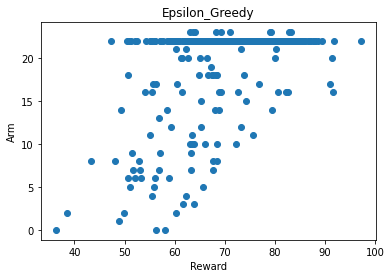

In [22]:
plt.scatter(results['Reward'],results['Arm'])
plt.title('Epsilon_Greedy')
plt.xlabel('Reward')
plt.ylabel('Arm')
plt.show()

Average rewards =  [50.19630202566409, 48.94420063049756, 49.54963879196799, 62.766928969188726, 58.837577743277336, 57.57441187254865, 54.20208320071093, 58.507722324044735, 56.04745535977496, 57.266631307353755, 66.2101349815801, 64.71618247038867, 65.91852734551131, 56.939421530855256, 64.82422991778787, 69.73357898556083, 71.84479638569078, 68.05274753558628, 65.96522404006211, 67.1660929417365, 69.76411017660499, 69.01257805699322, 72.42504272870143, 72.33707395750959]


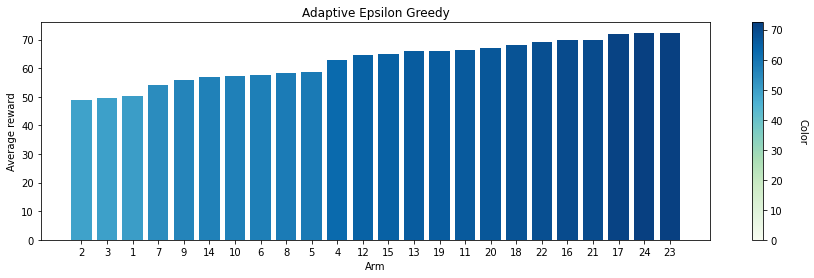

Best Arm =  23


In [23]:
print('Average rewards = ', average_rewards)
data = {'Arm': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
        'epsilon_average_rewards':average_rewards}

df = pd.DataFrame(data)
df.sort_values('epsilon_average_rewards', axis = 0, ascending = True, inplace = True)

data_x = df['Arm']
data_hight = df['epsilon_average_rewards']
data_hight_normalized = [x / max(data_hight) for x in data_hight]
fig, ax = plt.subplots(figsize=(15, 4))
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_hight_normalized)
rects = ax.bar(data_x, data_hight, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_hight)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

plt.xticks(data_x)    
plt.ylabel('Average reward')
plt.xlabel('Arm')
plt.title('Adaptive Epsilon Greedy')
plt.savefig("bar_chart_with_colorbar_04.png", bbox_inches='tight')
plt.show()

print('Best Arm = ', str(average_rewards.index(max(average_rewards))+1))

In [24]:
import math

def ucb(number_arms, counts, average_rewards, ucb_values):    
    if 0 in counts:
        return counts.index(0)
    else:
        sum_count = sum(counts)
        plus_ucb = np.sqrt((2*math.log(sum_count))/np.array(counts))
        for a in range(number_arms):
            ucb_values[a] = average_rewards[a] + plus_ucb[a]
            
        selected_arm = ucb_values.index(max(ucb_values))
    return selected_arm

In [25]:
def use_ucb(total_round):
    number_arms = 24
    counts = [0 for arm in range(number_arms)]
    total_count = 0
    average_rewards = [0 for arm in range(number_arms)]
    ucb_values = [0.0 for arm in range(number_arms)]
    
    results = []

    for t in range(total_round):
        selected_arm = ucb(number_arms, counts, average_rewards, ucb_values)
        result = ps.pull(selected_arm)
        print(result)
        reward = result['Reward']
        
        counts[selected_arm] += 1
        total_count = sum(counts)
        count = counts[selected_arm] 
        average_rewards[selected_arm] =  ((count-1)/count) * average_rewards[selected_arm] + (1/count) * reward
        results.append([selected_arm, counts[selected_arm], reward])
        
        if t%10 == 0:
            print("Pull =", t, '; Best Arm = ', str(average_rewards.index(max(average_rewards))+1))
        
    return results, average_rewards

In [26]:
total_round = 480
ps = pull_simulator(generate_sim())
results, average_rewards = use_ucb(total_round)

{'Arm': 0, 'NetReward': 55.63221478319619, 'Pull': 1, 'Reward': 55.63221478319619}
Pull = 0 ; Best Arm =  1
{'Arm': 1, 'NetReward': 49.863763980763984, 'Pull': 1, 'Reward': 49.863763980763984}
{'Arm': 2, 'NetReward': 42.6304911514885, 'Pull': 1, 'Reward': 42.6304911514885}
{'Arm': 3, 'NetReward': 54.376878366320824, 'Pull': 1, 'Reward': 54.376878366320824}
{'Arm': 4, 'NetReward': 58.88822449321799, 'Pull': 1, 'Reward': 58.88822449321799}
{'Arm': 5, 'NetReward': 50.76398678205654, 'Pull': 1, 'Reward': 50.76398678205654}
{'Arm': 6, 'NetReward': 65.60798346015868, 'Pull': 1, 'Reward': 65.60798346015868}
{'Arm': 7, 'NetReward': 53.67989891237408, 'Pull': 1, 'Reward': 53.67989891237408}
{'Arm': 8, 'NetReward': 56.13977675911243, 'Pull': 1, 'Reward': 56.13977675911243}
{'Arm': 9, 'NetReward': 54.83460346018436, 'Pull': 1, 'Reward': 54.83460346018436}
{'Arm': 10, 'NetReward': 68.0643886865601, 'Pull': 1, 'Reward': 68.0643886865601}
Pull = 10 ; Best Arm =  11
{'Arm': 11, 'NetReward': 59.429509

{'Arm': 23, 'NetReward': 4722.489162671685, 'Pull': 65, 'Reward': 64.76829722843686}
{'Arm': 23, 'NetReward': 4793.718401310608, 'Pull': 66, 'Reward': 71.22923863892251}
{'Arm': 23, 'NetReward': 4870.70989140259, 'Pull': 67, 'Reward': 76.99149009198187}
{'Arm': 23, 'NetReward': 4944.138788530343, 'Pull': 68, 'Reward': 73.42889712775295}
{'Arm': 23, 'NetReward': 5015.092327746165, 'Pull': 69, 'Reward': 70.95353921582269}
Pull = 100 ; Best Arm =  24
{'Arm': 23, 'NetReward': 5096.191304182596, 'Pull': 70, 'Reward': 81.09897643643036}
{'Arm': 23, 'NetReward': 5159.045582199246, 'Pull': 71, 'Reward': 62.854278016651165}
{'Arm': 23, 'NetReward': 5237.68892844094, 'Pull': 72, 'Reward': 78.64334624169366}
{'Arm': 23, 'NetReward': 5310.557229585976, 'Pull': 73, 'Reward': 72.86830114503606}
{'Arm': 23, 'NetReward': 5387.438215536977, 'Pull': 74, 'Reward': 76.88098595100067}
{'Arm': 23, 'NetReward': 5458.353634414123, 'Pull': 75, 'Reward': 70.91541887714584}
{'Arm': 23, 'NetReward': 5531.43214436

{'Arm': 23, 'NetReward': 11832.929927863484, 'Pull': 161, 'Reward': 65.94158148270348}
{'Arm': 23, 'NetReward': 11909.25801223089, 'Pull': 162, 'Reward': 76.32808436740605}
{'Arm': 23, 'NetReward': 11975.054375885537, 'Pull': 163, 'Reward': 65.7963636546457}
{'Arm': 23, 'NetReward': 12057.47201812065, 'Pull': 164, 'Reward': 82.41764223511393}
{'Arm': 23, 'NetReward': 12129.60154024304, 'Pull': 165, 'Reward': 72.12952212238946}
{'Arm': 23, 'NetReward': 12208.5985585406, 'Pull': 166, 'Reward': 78.99701829755921}
{'Arm': 23, 'NetReward': 12275.44921372275, 'Pull': 167, 'Reward': 66.85065518215055}
{'Arm': 23, 'NetReward': 12358.034105367286, 'Pull': 168, 'Reward': 82.58489164453617}
{'Arm': 23, 'NetReward': 12419.01440642971, 'Pull': 169, 'Reward': 60.9803010624238}
Pull = 200 ; Best Arm =  24
{'Arm': 23, 'NetReward': 12500.121711891783, 'Pull': 170, 'Reward': 81.10730546207378}
{'Arm': 23, 'NetReward': 12569.943206076172, 'Pull': 171, 'Reward': 69.8214941843885}
{'Arm': 23, 'NetReward': 

{'Arm': 23, 'NetReward': 19054.12203465977, 'Pull': 260, 'Reward': 64.2114194873674}
{'Arm': 23, 'NetReward': 19118.51103686182, 'Pull': 261, 'Reward': 64.38900220204872}
{'Arm': 23, 'NetReward': 19197.599498381198, 'Pull': 262, 'Reward': 79.08846151938013}
{'Arm': 23, 'NetReward': 19282.377833940405, 'Pull': 263, 'Reward': 84.77833555920859}
{'Arm': 23, 'NetReward': 19361.952783750046, 'Pull': 264, 'Reward': 79.57494980964016}
{'Arm': 23, 'NetReward': 19446.058452478122, 'Pull': 265, 'Reward': 84.10566872807655}
{'Arm': 23, 'NetReward': 19517.203018357395, 'Pull': 266, 'Reward': 71.14456587927396}
{'Arm': 23, 'NetReward': 19608.49905334949, 'Pull': 267, 'Reward': 91.29603499209537}
{'Arm': 23, 'NetReward': 19683.07056160663, 'Pull': 268, 'Reward': 74.57150825714088}
{'Arm': 23, 'NetReward': 19750.12245577397, 'Pull': 269, 'Reward': 67.05189416733958}
Pull = 300 ; Best Arm =  24
{'Arm': 23, 'NetReward': 19799.55901535624, 'Pull': 270, 'Reward': 49.436559582271556}
{'Arm': 23, 'NetRewar

{'Arm': 23, 'NetReward': 26416.968449046744, 'Pull': 361, 'Reward': 71.62666179995803}
{'Arm': 23, 'NetReward': 26487.054312360553, 'Pull': 362, 'Reward': 70.08586331380788}
{'Arm': 23, 'NetReward': 26566.52274429753, 'Pull': 363, 'Reward': 79.4684319369758}
{'Arm': 23, 'NetReward': 26652.73902560197, 'Pull': 364, 'Reward': 86.21628130444218}
{'Arm': 23, 'NetReward': 26729.805553243586, 'Pull': 365, 'Reward': 77.06652764161576}
{'Arm': 23, 'NetReward': 26805.4813127906, 'Pull': 366, 'Reward': 75.67575954701519}
{'Arm': 23, 'NetReward': 26878.544138754874, 'Pull': 367, 'Reward': 73.06282596427245}
{'Arm': 23, 'NetReward': 26935.911320004274, 'Pull': 368, 'Reward': 57.36718124939981}
{'Arm': 23, 'NetReward': 27000.33527920267, 'Pull': 369, 'Reward': 64.42395919839738}
Pull = 400 ; Best Arm =  24
{'Arm': 23, 'NetReward': 27071.972185885992, 'Pull': 370, 'Reward': 71.63690668332242}
{'Arm': 23, 'NetReward': 27144.847266039105, 'Pull': 371, 'Reward': 72.87508015311407}
{'Arm': 23, 'NetRewar

In [27]:
# convert to dataframe
col = ['Arm', 'Pull', 'Reward']
results = pd.DataFrame(results, columns=col)
display(results)

,Arm,Pull,Reward
0,0,1,55.632215
1,1,1,49.863764
2,2,1,42.630491
3,3,1,54.376878
4,4,1,58.888224
...,...,...,...
475,23,444,85.684729
476,23,445,70.835604
477,23,446,80.405572
478,23,447,74.571827


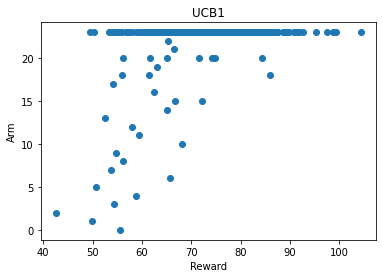

In [28]:
plt.scatter(results['Reward'],results['Arm'])
plt.title('UCB1')
plt.xlabel('Reward')
plt.ylabel('Arm')
plt.show()

Average rewards =  [55.63221478319619, 49.863763980763984, 42.6304911514885, 54.376878366320824, 58.88822449321799, 50.76398678205654, 65.60798346015868, 53.67989891237408, 56.13977675911243, 54.83460346018436, 68.0643886865601, 59.42950976438626, 58.06603105368596, 52.44054366437595, 65.0587665126914, 69.52239536216612, 62.45259344853248, 54.07489371949221, 67.7895365987703, 63.086174763709145, 69.69315268810955, 66.4438574820722, 65.26693072665032, 73.19810367716987]


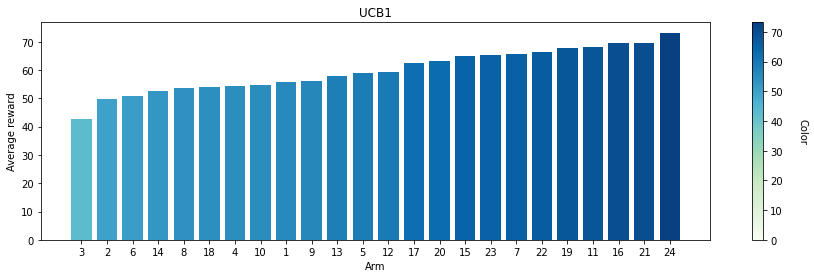

Best Arm =  24


In [29]:
print('Average rewards = ', average_rewards)

data = {'Arm': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
        'UCB1_average_rewards':average_rewards}

df = pd.DataFrame(data)
df.sort_values('UCB1_average_rewards', axis = 0, ascending = True, inplace = True)

data_x = df['Arm']
data_hight = df['UCB1_average_rewards']
data_hight_normalized = [x / max(data_hight) for x in data_hight]
fig, ax = plt.subplots(figsize=(15, 4))
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_hight_normalized)
rects = ax.bar(data_x, data_hight, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_hight)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

plt.xticks(data_x)    
plt.ylabel('Average reward')
plt.xlabel('Arm')
plt.title('UCB1')
plt.savefig("bar_chart_with_colorbar_05.png", bbox_inches='tight')
plt.show()

print('Best Arm = ', str(average_rewards.index(max(average_rewards))+1))